# Validation: Testing effect of combinations of CMs 
This notebook:

* loads a library defined model. 
* loads the data according to the data preprocessor class.
* Plots the combined effects of combinations of CMs

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
### Initial imports
import logging
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt
import types
import seaborn as sns
import scipy

logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from epimodel.pymc3_models.utils import geom_convolution
from epimodel.pymc3_models import cm_effect
from epimodel.pymc3_models.cm_effect.datapreprocessor import DataPreprocessorV2

%matplotlib inline

In [5]:
# name, epidemicforecasting.org code, OxCGRT code
region_info = [
    ("Andorra", "AD", "AND"),
    ("Austria", "AT",  "AUT"),
    ("Bosnia and Herzegovina", "BA", "BIH"),
    ("Belgium", "BE", "BEL"),
    ("Bulgaria",  "BG", "BGR"),
    ("Switzerland", "CH", "CHE"),
    ("Czech Republic", "CZ", "CZE"),
    ("Germany", "DE", "DEU"),
    ("Denmark", "DK", "DNK"),
    ("Estonia","EE", "EST"),
    ("Spain", "ES", "ESP"),
    ("Finland", "FI", "FIN"),
    ("France", "FR", "FRA"),
    ("United Kingdom", "GB", "GBR"),
    ("Greece", "GR", "GRC"),
    ("Croatia", "HR", "HRV"),
    ("Hungary", "HU", "HUN"),
    ("Ireland", "IE", "IRL"),
    ("Israel", "IL", "ISR"),
    ("Iceland", "IS", "ISL"),
    ("Italy", "IT", "ITA"),
    ("South Korea", "KR", "KOR"),
    ("Morocco", "MA", "MAR"),
    ("Mexico","MX", "MEX"),
    #("Malaysia", "MY", "MYS"),
    ("Netherlands", "NL", "NLD"),
    ("Poland","PL", "POL"),
    ("Romania","RO", "ROU"),
    ("Serbia", "RS", "SRB"),
    ("Sweden", "SE", "SWE"),
    ("Singapore", "SG", "SGP"),
    ("Slovenia", "SI", "SVN"),
    ("Slovakia", "SK", "SVK"),
    ("South Africa", "ZA",  "ZAF")
]

# OxCGRT
oxcgrt_cm_cols = ["C1_School closing", "C1_Flag", "C4_Restrictions on gatherings", "C4_Flag", "C6_Stay at home requirements",
              "C6_Flag", "H2_Testing policy", "H3_Contact tracing"]

oxcgrt_filter = [
    ("Symptomatic Testing", [(6, [2, 3])]),
    ("Public Testing", [(6, [3])]),
    ("Limited Contact Tracing", [(7, [2, 3])]),
    ("Extensive Contact Tracing", [(7, [2, 3])]),
    ("Gatherings lim. 1000", [(2, [2, 3, 4]), (3, [1])]),
    ("Gatherings lim. 100", [(2, [3, 4]), (3, [1])] ),
    ("Gatherings lim. 10", [(2, [4]), (3, [1])] ),
    ("Some Schools Closed", [(0, [3, 2]), (1, [1])]),
    ("All Schools Closed", [(0, [3]), (1, [1])] ),
    ("Stay at Home, Rec", [(4, [1, 2, 3]), (5, [1])] ),
    ("Stay at Home, Req", [(4, [2, 3]), (5, [1])] ),
]

epifor_features = [
 'Mask wearing over 70%',
 'Business suspended - some',
 'Business suspended - many',
 'Healthcare specialisation'
]

final_features_ordered = [
    "Healthcare specialisation",
    "Symptomatic Testing",
    "Public Testing",
    "Limited Contact Tracing",
    "Extensive Contact Tracing",
    "Mask wearing over 70%",
    "Gatherings lim. 1000", 
    "Gatherings lim. 100",
    "Gatherings lim. 10", 
    "Business suspended - some",
    "Business suspended - many",
    "Some Schools Closed",
    "All Schools Closed", 
    "Stay at Home, Rec", 
    "Stay at Home, Req",
]

dp = DataPreprocessorV2(min_num_confirmed_mask=100, min_num_active_mask=100, end_date="2020-04-20")

INFO:epimodel.regions:Name index has 7 potential conflicts: ['american samoa', 'georgia', 'guam', 'northern mariana islands', 'puerto rico', 'united states minor outlying islands', 'virgin islands (u.s.)']
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:
Countermeasures: Epidemic Forecasting              min   ... mean  ... max   ... unique
 1 Mask wearing over 70%                      0.000 ... 0.062 ... 1.000 ... [0. 1.]
 2 Business suspended - some                  0.000 ... 0.272 ... 1.000 ... [0. 1.]
 3 Business suspended - many                  0.000 ... 0.197 ... 1.000 ... [0. 1.]
 4 Healthcare specialisation                  0.000 ... 0.056 ... 1.000 ... [0. 1.]
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (28,30,34,45) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
INFO:epimodel.pymc3_models.cm_effect.datapreprocesso

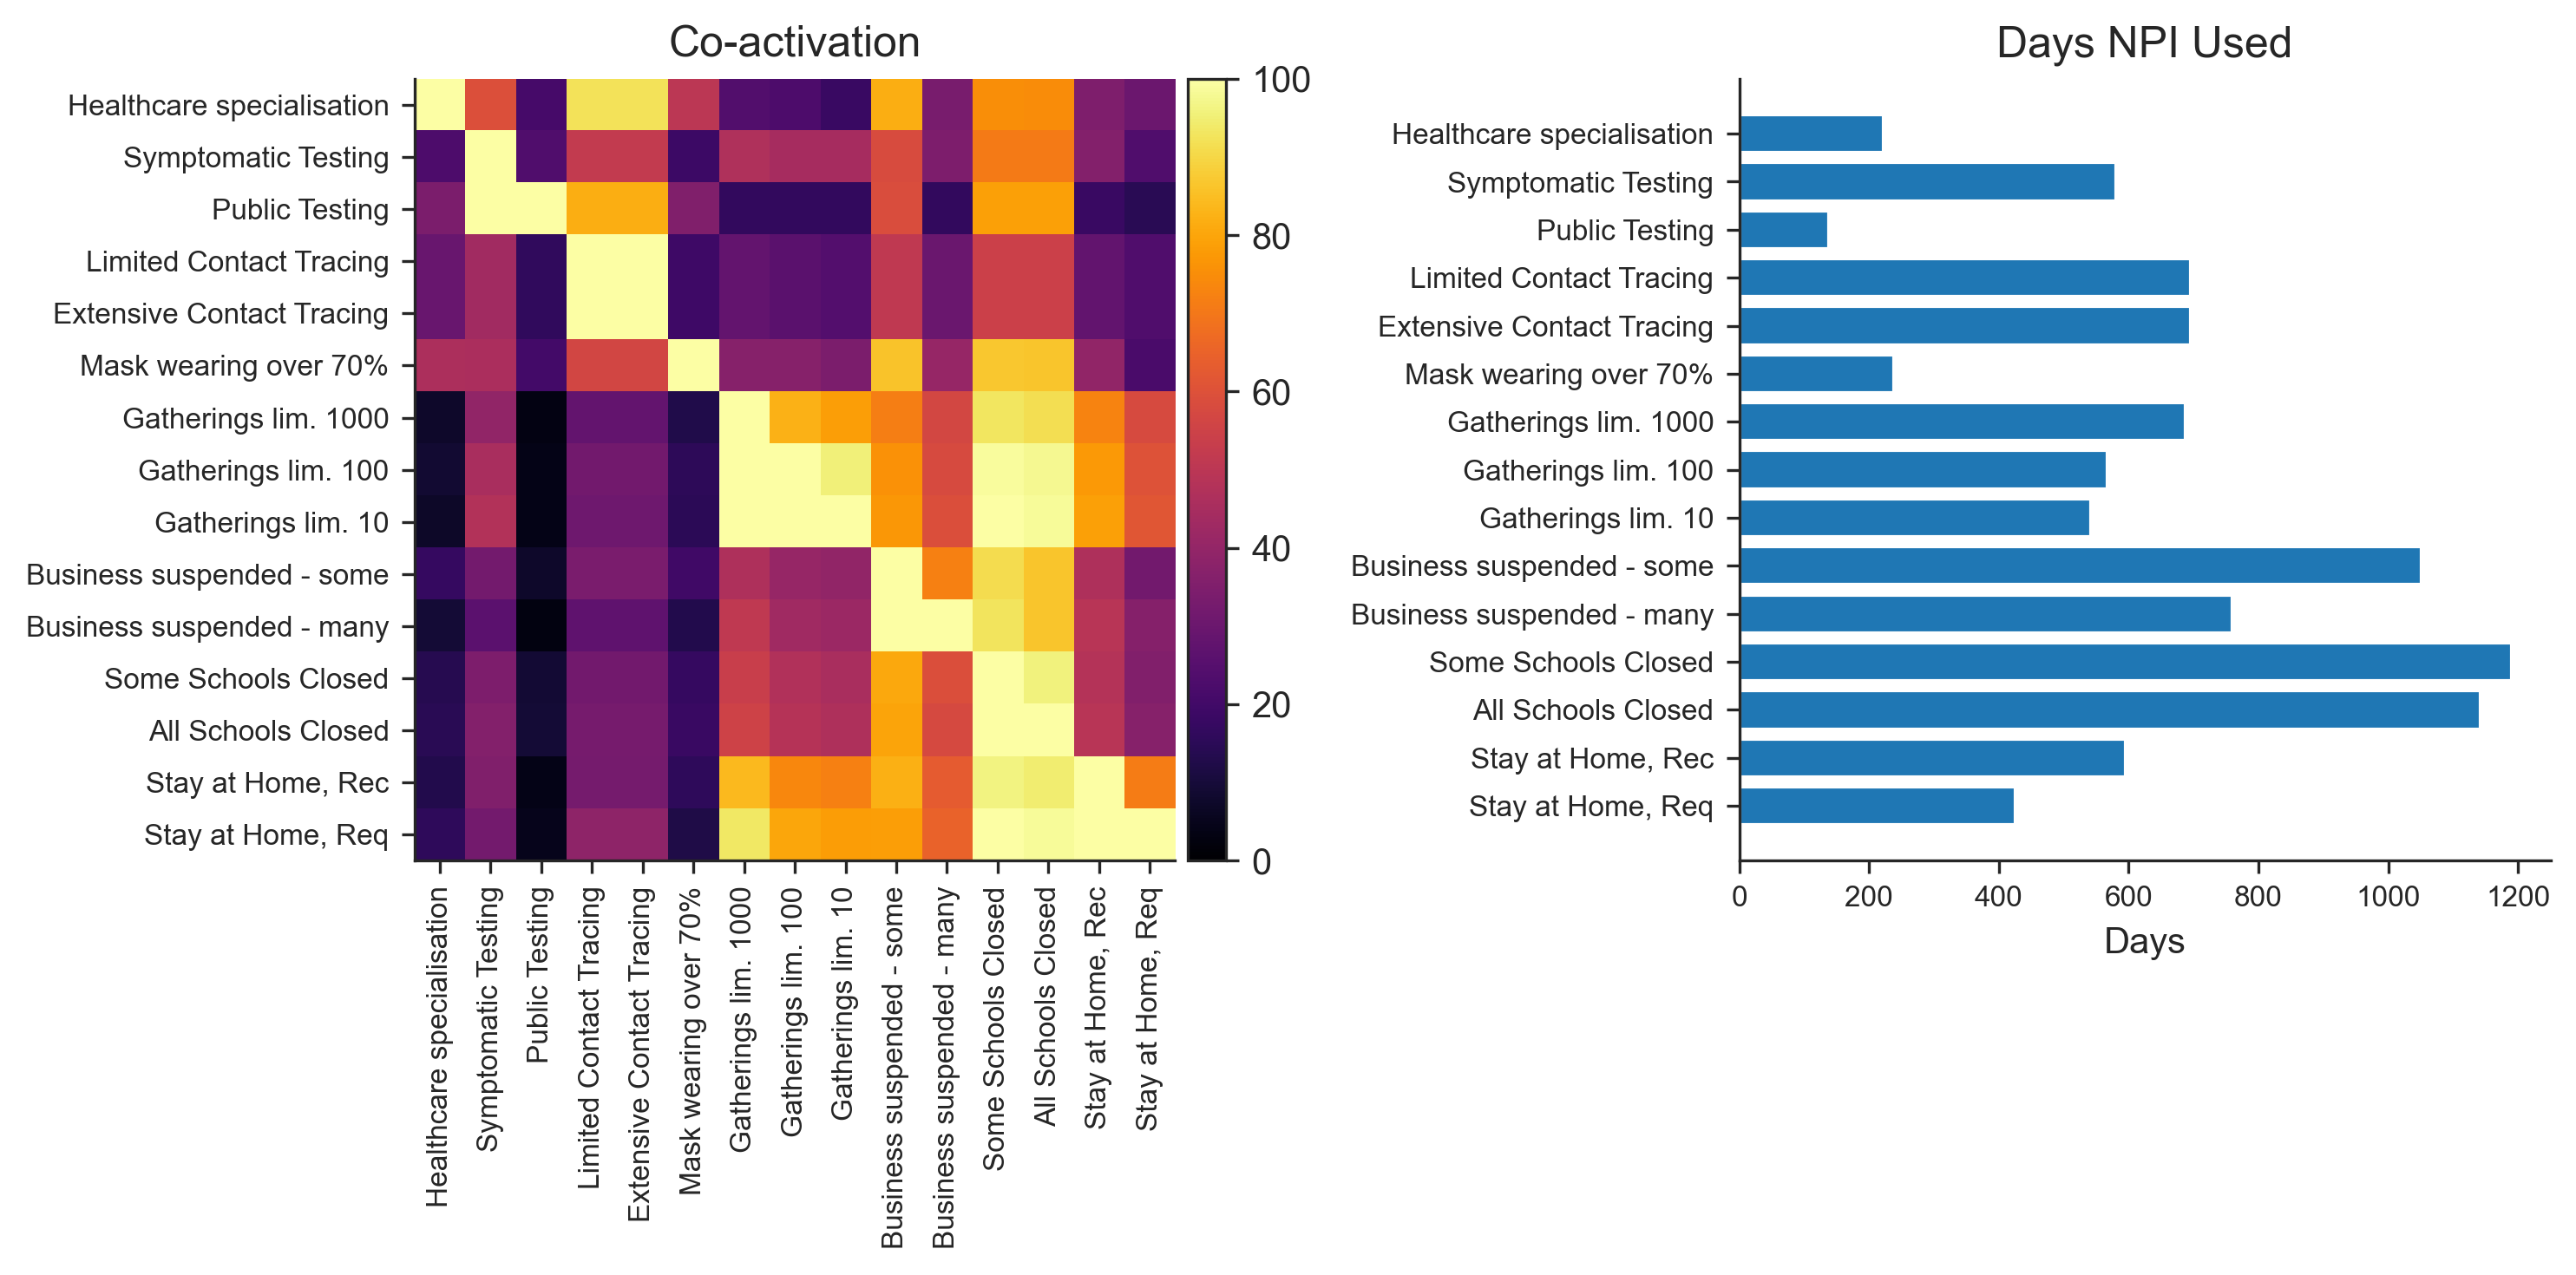

In [7]:
data = dp.preprocess_data("../../data", 
                          region_info, oxcgrt_filter, 
                          oxcgrt_cm_cols, epifor_features, 
                          final_features_ordered)

##### Build model and run 

/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/pymc3/model.py:1430: ImputationWarning: Data in ObservedConfirmed contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/pymc3/model.py:1430: ImputationWarning: Data in ObservedDeaths contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
INFO:pymc3:Initializing NUTS using adapt_diag...


DeathsNoise_log__                -0.77
HyperGrowthRateMean_log__        -0.77
HyperGrowthRateVar_log__         -0.77
RegionGrowthRate_log__          -18.23
CM_Alpha                         10.36
ReportRateMean                   -1.64
ReportRateStd_log__              -0.77
ReportRateLog                   -53.20
DelayCMean                       -1.32
DelayCAlpha                      -1.32
Growth                         3241.88
InitialSize                    -258.28
ObservedConfirmed_missing         0.00
ObservedDeaths_missing            0.00
ObservedConfirmed           -255784.83
ObservedDeaths               -96236.45
Name: Log-probability of test_point, dtype: float64


Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ObservedDeaths_missing, ObservedConfirmed_missing, InitialSize, Growth, DelayCAlpha, DelayCMean, ReportRateLog, ReportRateStd, ReportRateMean, CM_Alpha, RegionGrowthRate, HyperGrowthRateVar, HyperGrowthRateMean, DeathsNoise]
INFO:pymc3:NUTS: [ObservedDeaths_missing, ObservedConfirmed_missing, InitialSize, Growth, DelayCAlpha, DelayCMean, ReportRateLog, ReportRateStd, ReportRateMean, CM_Alpha, RegionGrowthRate, HyperGrowthRateVar, HyperGrowthRateMean, DeathsNoise]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [1:47:37<00:00,  1.29s/draws]  
The acceptance probability does not match the target. It is 0.9374030028425425, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9366980292437747, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effecti

/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/mat

/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/annie/anaconda/envs/py38/lib/python3.8/site-packages/arviz/plots/backends/mat

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c838040>,
      dtype=object)

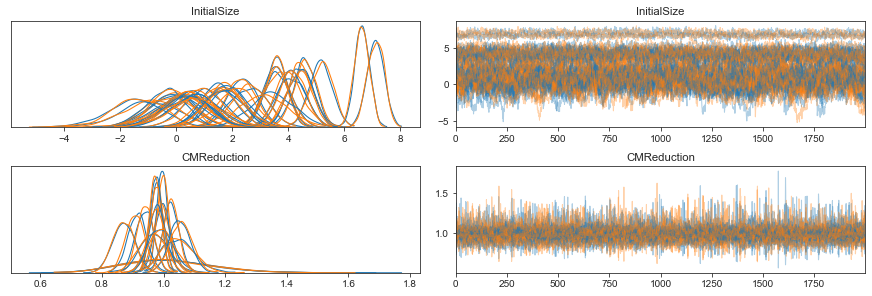

In [8]:
with cm_effect.models.CMConfirmedAndDeaths(data) as model:
    model.build()
    
model.run(2000)
model.plot_traces()

#### Combined CM effects

Let's characterize the effect of multiple countermeasures at once. To do this we need to combine CMReduction (labeled Countermeasure Effectiveness in plots). We'll call the countermeasure reduction $R_{cm}$. Note that $R_{cm}$ is related to $\alpha$ by $R_{cm} = \exp(-\alpha_{cm})$

$R_{cm}$ is the percent reduction of the daily growth $g_t$. So after the application of the first countermeasure, we have:
$g_{t_1} = (1-R_{cm_1}) g_{t_0}$

Therefore, after the application of a second countermeasure, we have:
$g_{t_2} = (1-R_{cm_2}) R_{t_1} = (1-R_{cm_2})(1-R_{cm_1}) g_{t_0}$

The coefficient in front of $g_{t_0}$ is the total percentage of the original daily growth that defines the new daily growth. To get the pecent reduction, we must subtract this coefficient from 1. So the combined effective $R_{cm}$ is:

$R_{cm_{1,2}} = 1-(1-R_{cm_2})(1-R_{cm_1})$

And we can generalize this to $n$ combined countermeasures as:
$R_{cm_{1,2,...n}} = 1-(1-R_{cm_2})(1-R_{cm_1})...(1-R_{cm_n})$

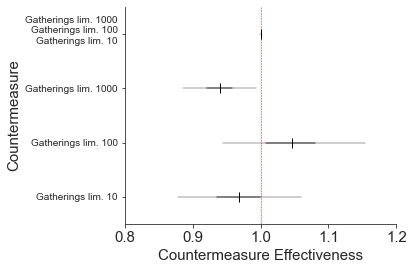

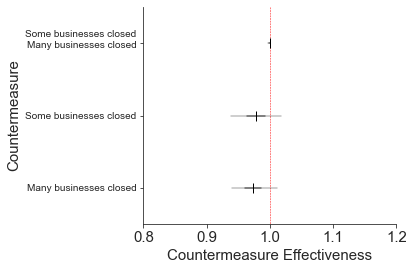

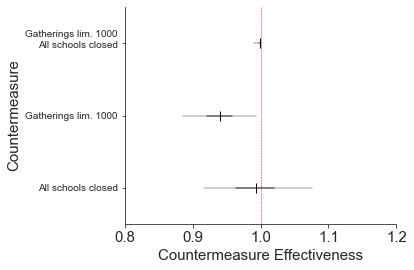

In [19]:
# dictionary for label names
feature_label_names = {"Healthcare specialisation":"Healthcare specialisation",
                       "Symptomatic Testing":"Symptomatic Testing",
                       "Public Testing":"Public Testing",
                       "Limited Contact Tracing":"Limited Contact Tracing",
                       "Limited Contact Tracing":"Limited Contact Tracing",
                       "Mask wearing over 70%":"Mask wearing over 70%",
                       "Gatherings lim. 1000":"Gatherings lim. 1000", 
                       "Gatherings lim. 100":"Gatherings lim. 100",
                       "Gatherings lim. 10":"Gatherings lim. 10", 
                       "Business suspended - some":"Some businesses closed",
                       "Business suspended - many":"Many businesses closed",
                       "Some Schools Closed":"Some schools closed",
                       "All Schools Closed":"All schools closed", 
                       "Stay at Home, Rec":"Stay at Home, Rec", 
                       "Stay at Home, Req":"Stay at Home, Req"}

feature_combos = [["Gatherings lim. 1000", 
                   "Gatherings lim. 100",
                   "Gatherings lim. 10"],
                  ["Business suspended - some",
                   "Business suspended - many"],
                  ["Gatherings lim. 1000",
                   "All Schools Closed"]]
features=final_features_ordered

for i in range(len(feature_combos)):

    feature_list = feature_combos[i]
    n_tot = len(feature_list) + 1 # +1 because we plot the combined with each feature
    y_vals = -1 * np.arange(n_tot)
    
    # set up plot
    plt.figure(figsize=(6, 4))
    plt.plot([1, 1], [1, -(n_tot)], "--r", linewidth=0.5)
    
    # calculate confidence intervals of individual cms
    li = np.percentile(model.trace["CMReduction"], 2.5, axis=0)
    ui = np.percentile(model.trace["CMReduction"], 97.5, axis=0)
    lq = np.percentile(model.trace["CMReduction"], 25, axis=0)
    uq = np.percentile(model.trace["CMReduction"], 75, axis=0)
    
    # get means and confidence intervals for all the features
    labels = []
    means = []
    label_combo = ''
    mean_combo = 1
    li_combo = 1
    ui_combo = 1
    lq_combo = 1
    uq_combo = 1
    for j in range(len(feature_list)):
        feature = feature_list[j]
        ind = np.where(feature == np.array(features))[0][0]
        
        # means
        mean = np.mean(model.trace["CMReduction"], axis=0)[ind]
        means.append(mean)
        mean_combo = mean_combo*(1-np.mean(model.trace["CMReduction"], axis=0)[ind])
        
        # confidence intervals
        li_combo = li_combo*(1-li[ind])
        ui_combo = ui_combo*(1-ui[ind])
        lq_combo = lq_combo*(1-lq[ind])
        uq_combo = uq_combo*(1-uq[ind])
        
        # plot the single countermeasure confidence intervals
        plt.plot([li[ind], ui[ind]], [y_vals[j+1], y_vals[j+1]], color='k', alpha=0.25, solid_capstyle='round') # j+1 since plot combo first
        plt.plot([lq[ind], uq[ind]], [y_vals[j+1], y_vals[j+1]], color='k', alpha=0.5, solid_capstyle='round')
        
        # make labels
        label_combo+= feature_label_names[feature] + '\n'
        label = feature_label_names[feature]
        labels.append(label)
    labels = [label_combo] + labels
    mean_combo = 1-mean_combo
    li_combo = 1-li_combo
    ui_combo = 1-ui_combo
    lq_combo = 1-lq_combo
    uq_combo = 1-uq_combo
    
    # plot means 
    all_means = np.append(mean_combo, np.array(means))
    plt.plot(all_means, y_vals, marker="|", markersize=10, color='k', linewidth=0)
    
    # plot combo
    plt.plot([li_combo, ui_combo], [y_vals[0], y_vals[0]], color='k', alpha=0.25, solid_capstyle='round')
    plt.plot([lq_combo, uq_combo], [y_vals[0], y_vals[0]], color='k', alpha=0.5, solid_capstyle='round')
    plt.xlim([0.8, 1.2])
    plt.rc('font', size=15)
    plt.ylim([-(n_tot - 0.5), 0.5])
    plt.ylabel("Countermeasure", rotation=90)
    plt.yticks(y_vals, labels, fontsize=10)
    #plt.xticks(np.arange(0.8,1.05, 0.05))
    plt.xlabel("Countermeasure Effectiveness")
    sns.despine()
    plt.tight_layout()
    plt.savefig('out/cm_combo_effects' + str(i) + '.pdf')